In [1]:
import sys
print(sys.executable)

/users/guest/e/egriff25/Updated_LLM_/.venv/bin/python


In [2]:
%pip install html2text


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install requests


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install lxml


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
%pip install spacy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install --upgrade --force-reinstall "numpy<2.0" "spacy<3.8"


  Using cached numpy-1.26.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
  Using cached spacy-3.7.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (27 kB)
  Using cached spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata (2.8 kB)
  Using cached spacy_loggers-1.0.5-py3-none-any.whl.metadata (23 kB)
  Using cached murmurhash-1.0.15-cp39-cp39-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (2.3 kB)
  Using cached cymem-2.0.13-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (9.7 kB)
  Using cached preshed-3.0.12-cp39-cp39-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (2.5 kB)
  Using cached thinc-8.2.5-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (15 kB)
  Using cached wasabi-1.1.3-py3-none-any.whl.metadata (28 kB)
  Using cached srsly-2.5.2-cp39-cp39-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (19 

In [7]:
%pip install "spacy<3.8" --only-binary=:all:


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
%pip install google


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [9]:
%pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [10]:
%pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
%pip install nltk


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
from operator import itemgetter

# nltk is what does all the magic language parsing
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer
import nltk

# for parsing wonky HTML-tag-cluttered descriptions
import html2text
from lxml import html

import numpy as np
import re

# for making timing performance tests
import time


# for fetching book descriptions
import requests
from googlesearch import search

# for stop words
from spacy.lang.en import STOP_WORDS
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords

# On your first time running this program, you'll need to run the following line to download the stuff from nltk to your local machine
#nltk.download(['stopwords', 'wordnet'])

In [13]:
#Long stop words list using 3 different python stopword libraries

stops = list(set(ENGLISH_STOP_WORDS)) + list(set(stopwords.words('english') +  list(set(STOP_WORDS)) + ["http"]))

In [14]:
#This Block loads the Lexicon and creates a data structure for the emotion intensity

fileEmotion = "emotion_itensity.txt"
table = pd.read_csv(fileEmotion,  names=["word", "emotion", "itensity"], sep='\t')

#create the dictionary with the word/emotion/score
emotion_dic = dict()
lmtzr = WordNetLemmatizer()
for index, row in table.iterrows():
    #add first as it is given in the lexicon
    temp_key = row['word'] + '#' + row['emotion']
    emotion_dic[temp_key] = row['itensity']

    #add in the normal noun form
    temp_key_n = lmtzr.lemmatize(row['word']) + '#' + row['emotion']
    emotion_dic[temp_key_n] = row['itensity']
    
    #add in the normal verb form
    temp_key_v = lmtzr.lemmatize(row['word'], 'v') + '#' + row['emotion']
    emotion_dic[temp_key_v] = row['itensity']    

In [15]:
print(emotion_dic)

{'outraged#anger': 0.964, 'outrage#anger': 0.848, 'brutality#anger': 0.959, 'hatred#anger': 0.953, 'hateful#anger': 0.94, 'terrorize#anger': 0.939, 'infuriated#anger': 0.938, 'infuriate#anger': 0.844, 'violently#anger': 0.938, 'furious#anger': 0.929, 'enraged#anger': 0.927, 'enrage#anger': 0.927, 'furiously#anger': 0.927, 'screwyou#anger': 0.924, 'murderer#anger': 0.922, 'fury#anger': 0.922, 'execution#anger': 0.917, 'angered#anger': 0.916, 'anger#anger': 0.811, 'savagery#anger': 0.915, 'slaughtering#anger': 0.914, 'slaughter#anger': 0.844, 'veryangry#anger': 0.913, 'assassinate#anger': 0.912, 'fuckoff#anger': 0.912, 'annihilation#anger': 0.912, 'rage#anger': 0.911, 'loathe#anger': 0.909, 'damnation#anger': 0.906, 'roadrage#anger': 0.906, 'fucktard#anger': 0.906, 'homicidal#anger': 0.906, 'furor#anger': 0.9, 'hostile#anger': 0.898, 'annihilate#anger': 0.865, 'murder#anger': 0.897, 'raging#anger': 0.896, 'rag#anger': 0.896, 'sopissed#anger': 0.894, 'pissed#anger': 0.894, 'piss#anger': 0

In [16]:
#create h to clean descriptions in case they are in html format
h = html2text.HTML2Text()
h.ignore_links = True

In [17]:
#function that get the emotion itensity
def getEmotionItensity(word,emotion):
    key = word + "#" + emotion
    try:
        return emotion_dic[key]
    except:
        return 0.0

In [18]:
#Check if the word is in the Lexicon
def isWordInEmotionFile(word):
    # Slightly faster implementation
    for key in emotion_dic.keys():
        if key.startswith(word + "#"):
            return True
    return False
    
# print(isWordInEmotionFile("anger"), isWordInEmotionFile("help"), isWordInEmotionFile("booger"))

In [19]:
#Stopping checker 
def isStopWord(word):
    if word in stops:
        return True
    else:
        return False

In [20]:
#Assign the emotion itensity to the dictionary
def calculateEmotion(emotions, word):
    emotions["Anger"] += getEmotionItensity(word, "anger")
    emotions["Anticipation"] += getEmotionItensity(word, "anticipation")
    emotions["Disgust"] += getEmotionItensity(word, "disgust")
    emotions["Fear"] += getEmotionItensity(word, "fear")
    emotions["Joy"] += getEmotionItensity(word, "joy")
    emotions["Sadness"] += getEmotionItensity(word, "sadness")
    emotions["Surprise"] += getEmotionItensity(word, "surprise")
    emotions["Trust"] += getEmotionItensity(word, "trust")

In [21]:
#get the emotion vector of a given text
def getEmotionVector(text, removeObj = False, useSynset = True):
    #create the initial emotions
    emotions = {"Anger": 0.0,
                "Anticipation": 0.0,
                "Disgust": 0.0,
                "Fear": 0.0,
                "Joy": 0.0,
                "Sadness": 0.0,
                "Surprise": 0.0,
                "Trust": 0.0,
                "Objective": 0.0}
    #parse the description
    str = re.sub("[^a-zA-Z]+", " ", text) # replace all non-letters with a space
    pat = re.compile(r'[^a-zA-Z ]+')
    str = re.sub(pat, '', str).lower() #  convert to lowercase

    #split string
    splits = str.split()

    
    #iterate over words array
    for split in splits:
        if not isStopWord(split):
            #first check if the word appears as it does in the text
            if isWordInEmotionFile(split): 
                calculateEmotion(emotions, split)
                
            # check the word in noun form (bats -> bat)
            elif isWordInEmotionFile(lmtzr.lemmatize(split)):
                calculateEmotion(emotions, lmtzr.lemmatize(split))
                
            # check the word in verb form (ran/running -> run)
            elif isWordInEmotionFile(lmtzr.lemmatize(split, 'v')):
                calculateEmotion(emotions, lmtzr.lemmatize(split, 'v'))  
                
            # check synonyms of this word
            elif useSynset and wordnet.synsets(split) is not None:
                # only check the first two "senses" of a word, so we don't stray too far from its intended meaning
                # for syn in wordnet.synsets(split)[0:1]:
                #     for l in syn.lemmas():
                #         if isWordInEmotionFile(l.name()):
                #             calculateEmotion(emotions, l.name())
                #             continue
                            
                # # none of the synonyms matched something in the file
                # emotions["Objective"] += 1
                found_syn = False
                for syn in wordnet.synsets(split)[0:1]:
                    for l in syn.lemmas():
                        if isWordInEmotionFile(l.name()):
                            calculateEmotion(emotions, l.name())
                            found_syn = True
                            break
                    if found_syn:
                        break

                if not found_syn:
                    emotions["Objective"] += 1
                
            else:
                # not found in the emotion file, assign a score to Objective instead
                emotions["Objective"] += 1

    # remove the Objective category if requested
    if removeObj:
        del emotions['Objective']
        
    total = sum(emotions.values())
    for key in sorted(emotions.keys()):
        try:
            # normalize the emotion vector
            emotions[key] = (1.0 / total) * emotions[key]
        except:
            emotions[key] = 0

    return emotions


In [22]:
#This block just test the functions above
#open description file
# file = open("description.txt","r")
# str_f = file.read()
# file.close()

# fetch book description from Apple Books
# str_f = fetchBookDesc("Stephen King's IT: novel")
# formatedDescription = h.handle(str_f)
# results = getEmotionVector(formatedDescription)

# print(results)

import matplotlib.pyplot as plt
from pylab import rcParams

# Graphs the emotion vector as a horizontal bar graph
def graphVector(results, title="Emotion Intensity", hasObjective = True):
    r = dict(results)
    if hasObjective:
        plt.barh(range(len(r)), list(r.values()), align='center')
        plt.yticks(range(len(r)), list(r.keys()))
    
        #plt.xlabel('Emotion')
        plt.title(title + ' with Objective')
        plt.show()
        
        del r['Objective']
        
    plt.barh(range(len(r)), list(r.values()), align='center')
    plt.yticks(range(len(r)), list(r.keys()))

    #plt.xlabel('Emotion')
    plt.title(title)
    plt.show()

# graphVector(results)

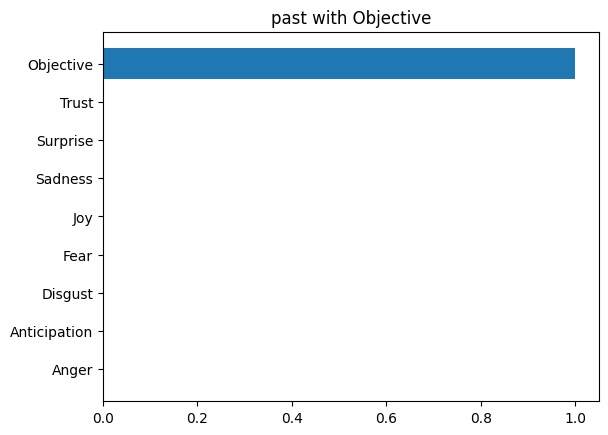

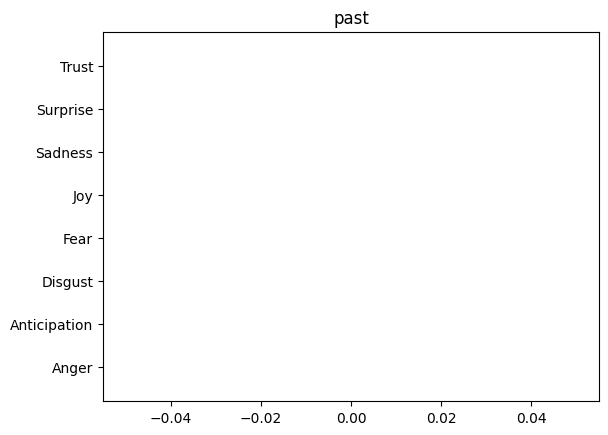

{'Anger': 0.0, 'Anticipation': 0.0, 'Disgust': 0.0, 'Fear': 0.0, 'Joy': 0.0, 'Sadness': 0.0, 'Surprise': 0.0, 'Trust': 0.0, 'Objective': 1.0}


In [23]:
word = "past"
graphVector(getEmotionVector(word), word)
print(getEmotionVector(word))

In [24]:
def noObj(v):
    r = dict(v)
    del r["Objective"]
    return r

In [25]:
def graphDifference(a, b, title = "difference"):
    # graph the difference between two emotion vectors
    dif = b - a
    emotions = {"Anger": dif[0],
            "Anticipation": dif[1],
            "Disgust": dif[2],
            "Fear": dif[3],
            "Joy": dif[4],
            "Sadness": dif[5],
            "Surprise": dif[6],
            "Trust": dif[7]}
    if len(dif) > 8:
        emotions["Objective"] = dif[8]
    # visually show the difference
    graphVector(emotions, title, False)
    return dif

In [26]:
def vectorMatch(zero, compare, shouldGraph = True, title = "difference"):
    # compare how close 'zero' and 'compare' are to each other visually
#     graphVector(zero, 'samp', False)
#     graphVector(compare, 'comp', False)
    # convert to np arrays
    zero = np.array(list(zero.values()))
    compare = np.array(list(compare.values()))
    
    # normalize both vectors
    zero = zero / np.linalg.norm(zero)
    compare = compare / np.linalg.norm(compare)
    
    # graph the difference graph
    if shouldGraph:
        graphDifference(zero, compare, title)
    
    # return the magnitude of the vector of the difference
    return np.linalg.norm(compare - zero)

# experiment shows that objective should largely be ignored


In [27]:
def cosine_similarity(vec1, vec2):
    v1 = np.array(list(vec1.values()), dtype = float)
    v2 = np.array(list(vec2.values()), dtype = float)
    if np.linalg.norm(v1) == 0 or np.linalg.norm(v2) == 0:
        return 0.0
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [28]:
import numpy as np

def normalize_vector(vec_dict):
    """Normalize a vector stored as a dict of {emotion: value}."""
    vec_dict = np.array(list(vec_dict.values()))
    vec_dict = vec_dict / np.linalg.norm(vec_dict)
    return vec_dict


In [29]:
# 1:Get the test users
#     a. Separate out users that 10+ high book ratings
#         i. High meaning either above 7 or 8
# 2: For each test users
#     a. Create a target emotion vector 
#         i. Take half of the books that got a high review
#             1. High meaning either above 7 or 8
#         ii. For each test book
#             1. Calculate emotion vector
#         iii. Average all emotion vectors
#         iv. This is that user’s target emotion vector
#     b. Use target emotion vector to predict the preference order of the books not used to create the target emotion vector 
#     c. Compare to actual preference order created by using the user’s rating 
#     d. Use some metrics to figure out how accurate the method is
# With step 2.b being different slightly different for 1) just the straight algorithm, 2) just the LLM, and 3) using the algorithm to n-shot the LLM[10:47 AM]Reminded me again which parts everyone is planning on handling so I know what I should work on?

In [30]:
# Combining: Give the LLM the books, the average emotion vector for all the books combined
# Ask the LLM to recommend a certain number of books. Check to see if the unused user books have been recommended

# For n shot prompting, follow the yes/no model
# Give the list of read books and the average emotion vector
# Take 1, 3, 5 (depending on the shot) of the unused books and say whether or not they should be recommended as our shot examples
# Query the rest of the unused books and see if it can predict whether or not the user liked it (whether or not it should be recommended)

# Other n shot option is to use the users themselves as examples
# This might take up too much of the context window though.

In [31]:
# Get the average emotion vector for user
# Using cosine similarity, compare the average vector to the books we didn't use in the vector
# Create a ranking of the most similar to least similar, and see if the other highly rated books are similar

In [32]:
import json
from typing import List, Dict

def load_users_with_high_rated_books(
    jsonl_path: str,
    min_rating: int = 7
) -> List[Dict]:
    """
    Reads a JSONL file of users and extracts books with rating >= min_rating.

    Returns a list of dicts:
    {
        "user_id": int,
        "age": float,
        "location": str,
        "high_rated_books": [
            {"isbn": str, "rating": int},
            ...
        ]
    }
    """
    users = []

    with open(jsonl_path, "r", encoding="utf-8") as f:
        for line_num, line in enumerate(f, start=1):
            line = line.strip()
            if not line:
                continue

            try:
                user = json.loads(line)
            except json.JSONDecodeError as e:
                print(f"Skipping line {line_num}: JSON error → {e}")
                continue

            high_rated_books = [
                {
                    "isbn": book["ISBN"],
                    "rating": book["Rating"]
                }
                for book in user.get("Books", [])
                if book.get("Rating", 0) >= min_rating
            ]

            users.append({
                "user_id": user.get("User-ID"),
                "age": user.get("Age"),
                "location": user.get("Location"),
                "high_rated_books": high_rated_books
            })

    return users



In [33]:
jsonl_file = "Users_under_20_10plus_reviews_over_7.jsonl"

users = load_users_with_high_rated_books(jsonl_file, min_rating=7)

# Example: print first user
print(users[0])
print(f"Total users: {len(users)}")


{'user_id': 709, 'age': 14.0, 'location': 'roanoke, virginia, usa', 'high_rated_books': [{'isbn': '0064405052', 'rating': 9}, {'isbn': '0152162445', 'rating': 10}, {'isbn': '015216250X', 'rating': 10}, {'isbn': '0152162577', 'rating': 10}, {'isbn': '0345391802', 'rating': 7}, {'isbn': '0439042917', 'rating': 9}, {'isbn': '043922165X', 'rating': 9}, {'isbn': '0440219078', 'rating': 10}, {'isbn': '0440415993', 'rating': 10}, {'isbn': '0590129015', 'rating': 10}, {'isbn': '0590897985', 'rating': 9}, {'isbn': '0689832877', 'rating': 10}, {'isbn': '1562477528', 'rating': 9}, {'isbn': '158852038', 'rating': 8}, {'isbn': '9780590962735', 'rating': 9}, {'isbn': '9781562477547', 'rating': 9}]}
Total users: 216


In [44]:
def average_vectors(emotion_vectors):
    avgVector = getEmotionVector("", True)
    for vector in emotion_vectors:
        for key in avgVector:
            avgVector[key] += vector[key]
    num_vectors = len(emotion_vectors)
    if num_vectors == 0:
        return None
    for key in avgVector:
        avgVector[key] = avgVector[key]/num_vectors
    return avgVector

In [35]:
def load_book_descriptions(jsonl_path: str) -> Dict[str, str]:
    """
    Loads a JSONLb file of book metadata and returns:
        { ISBN : description }
    """
    isbn_to_description = {}

    with open(jsonl_path, "r", encoding="utf-8") as f:
        for line_num, line in enumerate(f, start=1):
            line = line.strip()
            if not line:
                continue

            try:
                book = json.loads(line)
            except json.JSONDecodeError as e:
                print(f"Skipping line {line_num}: JSON error → {e}")
                continue

            isbn = book.get("ISBN")
            description = book.get("description", "")

            if isbn and description:
                isbn_to_description[isbn] = description

    return isbn_to_description


In [36]:
#isbn_to_description = load_book_descriptions("youth_books_with_topic.jsonl")
#isbn_to_description = load_book_descriptions("combined_books_with_metadata.jsonl")
isbn_to_description = load_book_descriptions("books_with_subjects_complete.jsonl")

In [37]:
def get_book_description(isbn):
    if isbn in isbn_to_description:
        return isbn_to_description[isbn]
    return("")

In [49]:
import random
def build_user_emotion_vector(user):
    random.seed(42)
    user_id = user["user_id"]
    high_books = user["high_rated_books"]
    random.shuffle(high_books)
    split_size = len(high_books) // 2
    seed_books = high_books[:split_size]

    emotion_vectors = []
    for book in seed_books:
        isbn = book["isbn"]
        description = get_book_description(isbn)
        if not description:
            continue
        vec = getEmotionVector(description, True)
        emotion_vectors.append(vec)
    
    target_vector = average_vectors(emotion_vectors)
    return target_vector, seed_books

In [48]:
jsonl_file = "Users_under_20_10plus_reviews_over_7.jsonl"

users_all_books = load_users_with_high_rated_books(jsonl_file, 0)

# Example: print first user
user0 = users_all_books[0]
print(user0)
print(f"Total users: {len(users_all_books)}")
rated_books = user0["high_rated_books"]
print(len(rated_books))


{'user_id': 709, 'age': 14.0, 'location': 'roanoke, virginia, usa', 'high_rated_books': [{'isbn': '0060535032', 'rating': 5}, {'isbn': '0064405052', 'rating': 9}, {'isbn': '0064409457', 'rating': 6}, {'isbn': '0152162445', 'rating': 10}, {'isbn': '015216250X', 'rating': 10}, {'isbn': '0152162577', 'rating': 10}, {'isbn': '0316666343', 'rating': 3}, {'isbn': '0330107372', 'rating': 0}, {'isbn': '0345391802', 'rating': 7}, {'isbn': '0439042917', 'rating': 9}, {'isbn': '043922165X', 'rating': 9}, {'isbn': '0439221676', 'rating': 4}, {'isbn': '0439221684', 'rating': 5}, {'isbn': '0439221706', 'rating': 4}, {'isbn': '0439221714', 'rating': 4}, {'isbn': '0439221730', 'rating': 4}, {'isbn': '0440219078', 'rating': 10}, {'isbn': '0440415993', 'rating': 10}, {'isbn': '0590129015', 'rating': 10}, {'isbn': '0590183729', 'rating': 5}, {'isbn': '0590897985', 'rating': 9}, {'isbn': '0689829698', 'rating': 6}, {'isbn': '0689832877', 'rating': 10}, {'isbn': '068983585X', 'rating': 0}, {'isbn': '089587

In [50]:
def getUnusedBooks(userData, usedBooks):
    used_isbns = {book["isbn"] for book in usedBooks}

    unusedBooks = []
    for book in userData["high_rated_books"]:
        if book["isbn"] not in used_isbns:
            unusedBooks.append(book)

    return unusedBooks


In [51]:
testUser = users[0]
user_vector, books_used = build_user_emotion_vector(testUser)
print(user_vector)
print(books_used)
unusedBooks = getUnusedBooks(users_all_books[0], books_used)
print(unusedBooks)
print(len(books_used))
print(len(unusedBooks))

{'Anger': 0.04490662987966607, 'Anticipation': 0.160623235561351, 'Disgust': 0.033603685896990934, 'Fear': 0.12457111196663792, 'Joy': 0.23080627801322695, 'Sadness': 0.06622342905891658, 'Surprise': 0.0941336967693707, 'Trust': 0.24513193285383986}
[{'isbn': '0440415993', 'rating': 10}, {'isbn': '015216250X', 'rating': 10}, {'isbn': '0590897985', 'rating': 9}, {'isbn': '1562477528', 'rating': 9}, {'isbn': '0064405052', 'rating': 9}, {'isbn': '158852038', 'rating': 8}, {'isbn': '0345391802', 'rating': 7}, {'isbn': '0152162445', 'rating': 10}]
[{'isbn': '0060535032', 'rating': 5}, {'isbn': '0064409457', 'rating': 6}, {'isbn': '0152162577', 'rating': 10}, {'isbn': '0316666343', 'rating': 3}, {'isbn': '0330107372', 'rating': 0}, {'isbn': '0439042917', 'rating': 9}, {'isbn': '043922165X', 'rating': 9}, {'isbn': '0439221676', 'rating': 4}, {'isbn': '0439221684', 'rating': 5}, {'isbn': '0439221706', 'rating': 4}, {'isbn': '0439221714', 'rating': 4}, {'isbn': '0439221730', 'rating': 4}, {'isb

In [52]:
books_with_cosine_similarities = []
for book in unusedBooks:
    isbn = book["isbn"]
    description = get_book_description(isbn)
    if not description:
        print(f"Skipping book isbn: {isbn}")
        continue
    vec = getEmotionVector(description, True)
    cos = cosine_similarity(user_vector, vec)
    book_with_score = {**book, "cos": cos}
    books_with_cosine_similarities.append(book_with_score)
print(books_with_cosine_similarities)
print(len(books_with_cosine_similarities))


Skipping book isbn: 0330107372
Skipping book isbn: 0590129015
Skipping book isbn: 0590183729
Skipping book isbn: 9780590962735
Skipping book isbn: 9781562477547
[{'isbn': '0060535032', 'rating': 5, 'cos': 0.9621520778241242}, {'isbn': '0064409457', 'rating': 6, 'cos': 0.6445246859030791}, {'isbn': '0152162577', 'rating': 10, 'cos': 0.9203368537245871}, {'isbn': '0316666343', 'rating': 3, 'cos': 0.8889458128959441}, {'isbn': '0439042917', 'rating': 9, 'cos': 0.7076480197087271}, {'isbn': '043922165X', 'rating': 9, 'cos': 0.9105458029763855}, {'isbn': '0439221676', 'rating': 4, 'cos': 0.9134162163922269}, {'isbn': '0439221684', 'rating': 5, 'cos': 0.9294052195576501}, {'isbn': '0439221706', 'rating': 4, 'cos': 0.6559070671792957}, {'isbn': '0439221714', 'rating': 4, 'cos': 0.4723147509274234}, {'isbn': '0439221730', 'rating': 4, 'cos': 0.7620941800712436}, {'isbn': '0440219078', 'rating': 10, 'cos': 0.9305066005563939}, {'isbn': '0689829698', 'rating': 6, 'cos': 0.9221327890358928}, {'is

In [ ]:
books_sorted_by_cos = sorted(
    books_with_cosine_similarities,
    key=lambda b: b.get("cos", float("-inf")),
    reverse=True
)
print("Books sorted by cosine similarity:\n")
print(len(books_sorted_by_cos))
for book in books_sorted_by_cos:
    isbn = book.get("isbn", "Unknown isbn")
    cos = book.get("cos", 0.0)
    print(f"{isbn} — cosine similarity: {cos:.4f}")

unused_books_sorted_by_rating = sorted(
    books_with_cosine_similarities,
    key=lambda b: b.get("rating", float("-inf")),
    reverse=True
)

print("\nUnused books sorted by rating:\n")
print(len(unused_books_sorted_by_rating))

for book in unused_books_sorted_by_rating:
    isbn = book.get("isbn", "Unknown isbn")
    rating = book.get("rating", "N/A")
    print(f"{isbn} — rating: {rating}")




In [54]:
all_results = {}

for user in users_all_books:
    user_id = user["user_id"]
    rated_books = user["high_rated_books"]
    user_vector, books_used = build_user_emotion_vector(user)
    unusedBooks = getUnusedBooks(user, books_used)
    books_sorted_by_cos = sorted(
        books_with_cosine_similarities,
        key=lambda b: b.get("cos", float("-inf")),
        reverse=True
    )
    unused_books_sorted_by_rating = sorted(
        books_with_cosine_similarities,
        key=lambda b: b.get("rating", float("-inf")),
        reverse=True
    )
    all_results[user_id] = {
        "recommendations": books_sorted_by_cos,
        "unused_books_by_rating": unused_books_sorted_by_rating
    }

In [55]:
import json

output_path = "emotion_vector_results.jsonl"

with open(output_path, "w", encoding="utf-8") as f:
    for user_id, data in all_results.items():
        record = {
            "user": user_id,
            "recommendations": data["recommendations"],
            "unused_books_by_rating": data["unused_books_by_rating"]
        }
        f.write(json.dumps(record) + "\n")
